# Data Bootcamp Final Project: Commodity - Currency Correlations

**Author: Apurva Gundaria**

**Email: [apurva.gundaria@stern.nyu.edu](mailto:apurva.gundaria@stern.nyu.edu)**

Many developing economies are heavily reliant on (at most) a few raw material exports. Nevertheless, the exchanges for these commodities are centralized and often prices are denominated in dollars. Fluctuations in the dollar price of these commdities can often impact demand for the local economy's currency and the dollar exchange rate as a result. Even so, these currencies are obviously impacted by a multitude of other factors. In this project, I hope to measure the fundamental correlation between these commodity exports and the currency as well as how external events affect this correlation.

In this project, I will explore the topic in several steps:
1. Data Source and Description
2. Tools and Packages
3. First Takeaways
   1. Oil and Russian Ruble
   2. Copper and Chilean Peso
   3. Iron Ore and Australian Dollar
   4. Gold and Swiss Franc
4. Big Picture Takeaways

## Data Report

The eight data segments all come from the Bloomberg Terminal. See the table below for tickers:

| Bloomberg Ticker | Security |
|:-----------------|:-------------------------------------:|
| CL1 Comdty | Generic 1st 'CL' Future (Light Crude) |
| HG1 Comdty | Generic 1st 'HG' Future (Copper) |
| MBIO62DA Index | Iron Ore Fines 62% Fe, Delivered to China |
| XAU Curncy | XAUUSD Spot Exchange Rate (Gold) |
| RUBUSD Curncy | RUBUSD Spot Exchange Rate (Russian Ruble) |
| CLPUSD Curncy | CLPUSD Spot Exchange Rate (Chilean Peso) |
| AUDUSD Curncy | AUDUSD Spot Exchange Rate (Australian Dollar) |
| CHFUSD Curncy | CHFUSD Spot Exchange Rate (Swiss Franc) |

Historical data for these tickers can easily be extracted from a Bloomberg Terminal and comes out in Excel format. The Terminal obviously contains far more data than just these eight tickers but I only need and use these eight. 

For the commodity listings, I pulled both last price data and daily volume data. For the index and currency listings, daily volume data is not available so I only have last price data. 
* Last price is the price of the last transaction on that day.
* Volume is the total contracts exchanged on a that day.

**Data Disclaimer:** Since the Bloomberg Terminal and its data is a subscription service, I will pull the data from my local computer and post a snippet of this data on GitHub. 

## My Packages

For my project, I will use the following packages:
* `display` package to display output in a nice way
* `Pandas` package to import, manipulate, merge, and analyze the data - the most important tool
* `Matplotlib` package to plot and visualize my data and correlations
* `numpy` package to perform some mathematical operations
* `statsmodels` package to conduct regression and correlation analysis on the data
* `datetime` package to help assign a date-time value to the dataseries

In [381]:
from IPython.display import display, Image  # Displays things nicely
import pandas as pd                         # Most important tool - data analysis
import matplotlib.pyplot as plt             # Helps plot and visualize
import numpy as np                          # Mathematical operations
import statsmodels.api as sm                # Stats models (regression)
import statsmodels.formula.api as smf   
import datetime as dt                       # Date-time values

## Data

Below are the steps to import the data from my local excel files into this notebook. Because I was able to extract only the data I needed from the Bloomberg, I should not need to do too much cleaning.

This is the path to the data on my computer. I have included another file variable to enable others to replicate the code by simply changing the path.

In [382]:
path = '/Users/apgundaria/Dropbox/data_bootcamp/Final Project/Actual Data/'

file = path + 'final_project_data.xlsx'

**Import Data**

In [383]:
oil = pd.read_excel(file, sheet_name = "CL1 Comdty") #finds oil's data in file and sets it to oil
copper = pd.read_excel(file, sheet_name = "HG1 Comdty") 
iron_ore = pd.read_excel(file, sheet_name = "MBIO62DA Index")
gold = pd.read_excel(file, sheet_name = "XAU Curncy")
rub = pd.read_excel(file, sheet_name = "RUBUSD Curncy")
clp = pd.read_excel(file, sheet_name = "CLPUSD Curncy")
aud = pd.read_excel(file, sheet_name = "AUDUSD Curncy")
chf = pd.read_excel(file, sheet_name = "CHFUSD Curncy")

When Bloomberg outputs data onto Excel, the cleanest process involves creating separate sheets for each dataset. As a result, each import step set a new variable to a different sheet. 

Since each data set will be paired with another, I will reserve some of the other cleaning for later in the process. Let's get started!

## First Takeaways

### Oil and the Russian Ruble

Oil and oil-related products comprise more than 45% of Russia's exports in 2016. Russia is also one of the world's largest oil exporters in the world. However, unlike other oil exporters such as Saudi Arabia, Russia has a free-floating currency. As a result, I can use the Ruble as an example of a oil-dependent currency.

First, a couple data issues to clean up. I will set both indices to the date and remove the volume column from the Ruble data since it is returning null values. 

In [384]:
oil.set_index("Date", inplace = True) # set index to date

oil.columns = ['Oil_Price', 'Oil_Volume'] # rename columns

oil.head()

,Oil_Price,Oil_Volume
Date,,
2012-11-29,111.07,11439
2012-11-30,111.91,16608
2012-12-03,112.09,14730
2012-12-04,111.50,11271
2012-12-05,110.88,23095


In [385]:
rub.set_index('Date', inplace = True) # set index to date

rub.drop('PX_VOLUME', axis = 1, inplace = True) # drop volume data
rub.columns = ["Ruble_Price"] # rename column

rub.head()

,Ruble_Price
Date,
2012-11-29,0.03237
2012-11-30,0.03237
2012-12-03,0.03237
2012-12-04,0.03243
2012-12-05,0.03247


Now that I have formatted the data, I am going to plot them side-by-side to see if the relationship is present in the market.

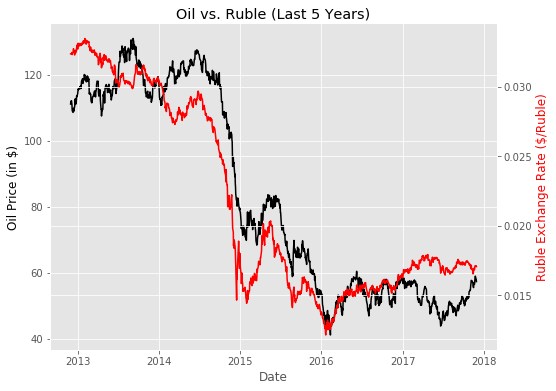

In [362]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize = (8,6))

ax1.plot(oil.Oil_Price, 'k-')
ax1.set_xlabel("Date")
ax1.set_ylabel("Oil Price (in $)", color = "k")
ax2 = ax1.twinx()
ax2.plot(rub.Ruble_Price, 'r-')
ax2.set_ylabel("Ruble Exchange Rate ($/Ruble)", color = 'r')

ax1.set_title("Oil vs. Ruble (Last 5 Years)")
ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)

plt.show()

It appears as if the two generally move together. Now, let's run a regression to put numbers to the relationship. First, to do this, I need to merge the data.

In [153]:
oil_rub = oil.dropna().join(rub)

oil_rub.tail() # checking to ensure dates still line up

,Oil_Price,Oil_Volume,Ruble_Price
Date,,,
2017-11-22,58.02,16404,0.01710
2017-11-24,58.95,17424,0.01712
2017-11-27,58.11,16964,0.01710
2017-11-28,57.99,19647,0.01712
2017-11-29,57.30,2757,0.01706


Important to note here that there would have been a difference between joining the Ruble data to the oil data (as done here) versus joining the oil data to the Ruble data. Because FX markets are open more than US markets, my choice to add the Ruble data to the oil data ignored 44 observations from the Ruble data. Because I am doing comparative work, I want to stick to dates where I have data for both but this may be different for other purposes.

Before I move on to the regression, I want to test a brief assumption. If my assumptions about a fundamental correlation between these two assets, the ratio between the two should be relatively constant. Let's test that.

In [154]:
oil_rub["Ratio"] = oil_rub["Oil_Price"] / oil_rub["Ruble_Price"] #adding new ratio column
oil_rub.head()

,Oil_Price,Oil_Volume,Ruble_Price,Ratio
Date,,,,
2012-11-29,111.07,11439,0.03237,3431.263516
2012-11-30,111.91,16608,0.03237,3457.213469
2012-12-03,112.09,14730,0.03237,3462.774174
2012-12-04,111.50,11271,0.03243,3438.174530
2012-12-05,110.88,23095,0.03247,3414.844472


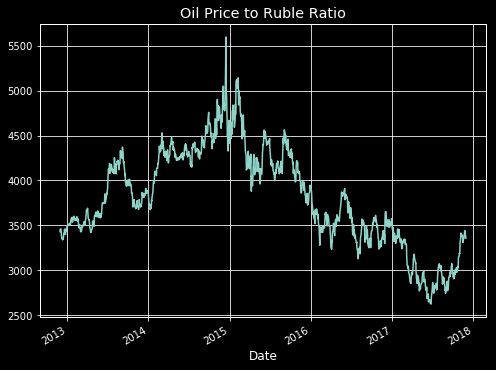

In [367]:
fig, ax = plt.subplots(figsize = (8,6))
plt.style.use('dark_background')

oil_rub.Ratio.plot()
ax.set_title("Oil Price to Ruble Ratio")

plt.show()

A quick look at the ratio between the two assets shows a significant amount of variation. While this may be puzzling at first, if we look back at the original graph, the Ruble nearly halved in value from 2013 to 2015. In the same period, the ratio almost doubled. This current graph may simply be displaying the difference in scales as opposed to the true ratio. 

A possible solution to this issue would be to take the median of the ratio and use that to adjust the stated Ruble value.

In [156]:
ratio_median = oil_rub.Ratio.median()

In [157]:
oil_rub["Adj_Rub"] = oil_rub["Ruble_Price"] * ratio_median
oil_rub["Adj_Ratio"] = oil_rub["Oil_Price"] / oil_rub["Adj_Rub"]

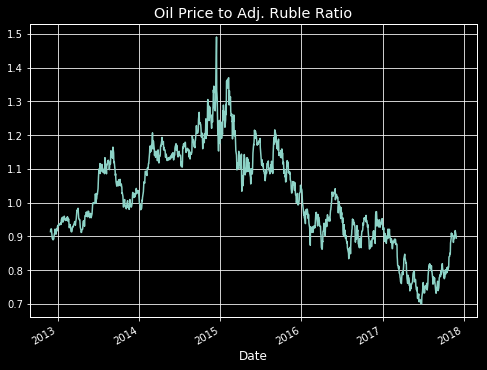

In [368]:
fig, ax = plt.subplots(figsize = (8,6))
plt.style.use('dark_background')

oil_rub.Adj_Ratio.plot()
ax.set_title("Oil Price to Adj. Ruble Ratio")

plt.show()

Now, since this graph is only an algebra adjustment different from the first graph, it will look the exact same as the previous one. But if you take a look at the scale, the ratio suddenly looks more stable. This is not necessarily to say it is more stable but worth looking at.

Now, let us move to the regression analysis.

In [159]:
reg_data = oil_rub[["Ruble_Price","Oil_Price"]].copy() #setting up a new dataframe for regression
results = smf.ols("Ruble_Price ~ Oil_Price", 
                  data = reg_data).fit() #conduct regression

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Ruble_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     8926.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        12:02:32   Log-Likelihood:                 5807.9
No. Observations:                1260   AIC:                        -1.161e+04
Df Residuals:                    1258   BIC:                        -1.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0040      0.000     20.261      0.0

Here, the numbers are extremely low because the Ruble prices are so low. Let us scale up the Ruble prices and run the regression again.

In [160]:
reg_data["Ruble_Price_1E3"] = reg_data["Ruble_Price"] * 1000 
reg_data.drop("Ruble_Price", axis = 1, inplace = True)
#multiplying all the prices by 1000 to make denominations easier

In [161]:
results = smf.ols("Ruble_Price_1E3 ~ Oil_Price", 
                  data = reg_data).fit() #conduct regression

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Ruble_Price_1E3   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     8926.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        12:02:39   Log-Likelihood:                -2895.9
No. Observations:                1260   AIC:                             5796.
Df Residuals:                    1258   BIC:                             5806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0114      0.198     20.261      0.0

The coefficent does help establish a relationship. For every dollar increase in oil price, the Ruble appreciates $0.000212. Again, denominations have an impact here.

The intercept relates to an interesting concept in currency valuation. Every currency possesses an inherent, intrinsic value arising from the country itself - the ultimate backer of the currency. Here, the value of the currency unrelated to oil prices is $0.004. Below is a plot of the oil prices and their corresponding Ruble prices. The line of best fit is also superimposed on top. 

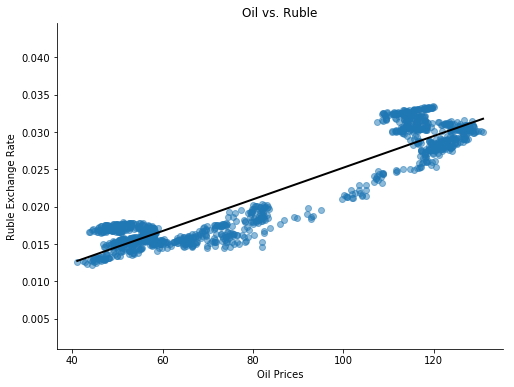

In [162]:
fig, ax = plt.subplots(figsize = (8,6))

# plot the relationship between the Ruble and oil
ax.scatter(oil_rub["Oil_Price"], 
         oil_rub["Ruble_Price"], 
         alpha = 0.50)

# generate predicted values from the regression
predictions = results.predict(exog = oil_rub["Oil_Price"].sort_values()) / 1000

# plot the line of best fit using the generated values
ax.plot(oil_rub["Oil_Price"].sort_values(), predictions , 
        color = 'k', linewidth = 2.0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Oil vs. Ruble")
ax.set_ylabel("Ruble Exchange Rate") 
ax.set_xlabel("Oil Prices")

plt.show()

This graphic presents a very interesting story and may have been worth looking at earlier. First, the line of best fit appears to have clear segments of data where it remains well above the majority of the points. The shape could imply that a regression involving a quadratic function may be more appropriate. Let us try to use that regression and compare the correlation values.

In [163]:
reg_data["Oil_Price_sqrd"] = np.square(reg_data["Oil_Price"])
results = smf.ols("Ruble_Price_1E3 ~ Oil_Price_sqrd", 
                  data = reg_data).fit() #conduct regression

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Ruble_Price_1E3   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        12:02:47   Log-Likelihood:                -2811.1
No. Observations:                1260   AIC:                             5626.
Df Residuals:                    1258   BIC:                             5637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.9988      0.113    105.

Using the oil price squared as the key parameter, the R-squared value improves marginally from 0.876 to 0.892. I am truly not sure how significant this increase in the R-squared value is but the regression results produce this equation: 
$$ ruble = (1.2*10^{-6})oil^2 + 0.01998 $$

Let's plot the equation to compare it visually to the older one.

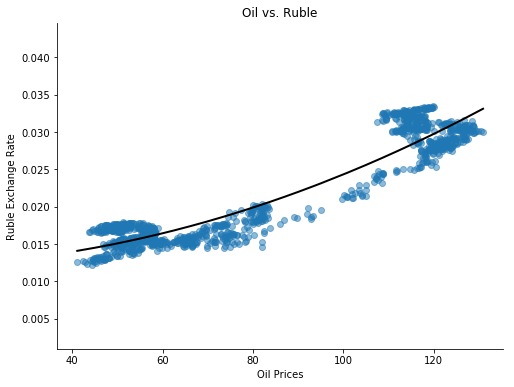

In [164]:
fig, ax = plt.subplots(figsize = (8,6))

# plot the relationship between the Ruble and oil
ax.scatter(oil_rub["Oil_Price"], 
         oil_rub["Ruble_Price"], 
         alpha = 0.50)

# generate predicted values from the regression
predictions = results.predict(exog = reg_data["Oil_Price_sqrd"].sort_values()) / 1000

# plot the line of best fit using the generated values
ax.plot(oil_rub["Oil_Price"].sort_values(), predictions , 
        color = 'k', linewidth = 2.0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Oil vs. Ruble")
ax.set_ylabel("Ruble Exchange Rate") 
ax.set_xlabel("Oil Prices")

plt.show()

Though this line of best fit appears to fit the scatter plot better than the previous one, it still has significant periods where it remains well above the plotted points. The line does fit better in the regions with more points so that may be a sign of progress. From a visual standpoint, this line just seems to flow with the scatter plot more than the other one.

From a fundamental standpoint, however, I am not sure how much this model makes sense. The original regression works on the assumption that as prices go up, the producer's profit increase by the corresponding increase in price. This regression assumes that increases at higher oil price levels lead to incrementally more gain. This argument may have some merit. It could be argued that at higher oil prices, the increase in profits flows more quickly to the bottom line. When comparing the models, it is important that I keep in mind what each model assumes and how accurate that assumption is.

Now, let's come back to the correlation values. Here, the R-squared value is 0.876 which is very high. This indicates to me that there is a relationship between oil prices and the Ruble exchange rate. This correlation may relate to the specific dynamics on the last five years but measuring the impact on other macroeconomic factors is a little beyond the scope of this project.

However, an aspect well within the scope of this project is how these correlations change over time. Because other factors affect a currency's value that may not affect the commodity's value, in the short-term, the correlation may change. 

Below, I have done some rolling correlation computations.

In [284]:
oil_rub["Pearson_30"] = oil_rub["Oil_Price"].rolling(window = 30).corr(oil_rub["Ruble_Price"])
oil_rub.tail(10)
# calculate rolling coefficients with a window of 30 days

,Oil_Price,Oil_Volume,Ruble_Price,Ratio,Adj_Rub,Adj_Ratio,Pearson_30,p30_shift
Date,,,,,,,,
2017-11-15,55.66,35543,0.01661,3350.993377,62.356031,0.892616,-0.736824,-0.753418
2017-11-16,55.47,17052,0.01675,3311.641791,62.881608,0.882134,-0.731155,-0.736824
2017-11-17,56.88,51447,0.01694,3357.733176,63.594892,0.894411,-0.768654,-0.731155
2017-11-20,56.42,11114,0.01683,3352.346999,63.181938,0.892977,-0.816870,-0.768654
2017-11-21,56.83,10069,0.01690,3362.721893,63.444727,0.895740,-0.828642,-0.816870
2017-11-22,58.02,16404,0.01710,3392.982456,64.195552,0.903801,-0.795948,-0.828642
2017-11-24,58.95,17424,0.01712,3443.341121,64.270635,0.917215,-0.743092,NaN
2017-11-27,58.11,16964,0.01710,3398.245614,64.195552,0.905203,-0.702374,-0.743092
2017-11-28,57.99,19647,0.01712,3387.266355,64.270635,0.902278,-0.657675,-0.702374


Now, to evaluate swings in correlation and isolate key moments, I am going to take the difference between successive correlation values. Then, after sorting in descending order, I will isolate the largest swings in correlation.

To do this, I will create a new column of code that shifts the correlation column one down and then subtract through the columns.

In [289]:
oil_rub["p30_shift"] = oil_rub["Pearson_30"].shift(1, freq = 'B') # creating a new offset column
oil_rub.tail()

,Oil_Price,Oil_Volume,Ruble_Price,Ratio,Adj_Rub,Adj_Ratio,Pearson_30,p30_shift,p30_delta
Date,,,,,,,,,
2017-11-22,58.02,16404,0.01710,3392.982456,64.195552,0.903801,-0.795948,-0.828642,-0.828642
2017-11-24,58.95,17424,0.01712,3443.341121,64.270635,0.917215,-0.743092,NaN,NaN
2017-11-27,58.11,16964,0.01710,3398.245614,64.195552,0.905203,-0.702374,-0.743092,-0.743092
2017-11-28,57.99,19647,0.01712,3387.266355,64.270635,0.902278,-0.657675,-0.702374,-0.702374
2017-11-29,57.30,2757,0.01706,3358.733880,64.045387,0.894678,-0.625906,-0.657675,-0.657675


The code commented out below is an attempt to resolve the NaN issues that arise from the offset code. I attempted to create a new calendar to use as the frequence for the shift method. However, two issues arise. First, the data I have does not follow the US Federal Holidays calendar perfectly - my data has 1255 entries over the period while there are 1260 working days over the 5 year period in question. However, more related to pandas, I was unable to create a calendar and use that calendar as the frequency. In any case, any feedback on this code would be appreciated. I have left my result out on the bottom; it looks no different than the code where the frequency is just 'B'. 

In [285]:
#from pandas.tseries.offsets import CustomBusinessDay
#from pandas.tseries.holiday import USFederalHolidayCalendar
#import holidays
#us_holidays = holidays.UnitedStates()
#bday_us = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#C = pd.DatetimeIndex(start = '2012-11-29', end = '2017-11-29', freq = bday_us)

In [286]:
#oil_rub["p30_delta"] = oil_rub["Pearson_30"].shift(1, freq = 'C')
#oil_rub.tail(10)

/Users/apgundaria/anaconda/lib/python3.6/site-packages/pandas/core/indexes/datetimes.py:844: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


,Oil_Price,Oil_Volume,Ruble_Price,Ratio,Adj_Rub,Adj_Ratio,Pearson_30,p30_shift,p30_delta
Date,,,,,,,,,
2017-11-15,55.66,35543,0.01661,3350.993377,62.356031,0.892616,-0.736824,-0.753418,-0.753418
2017-11-16,55.47,17052,0.01675,3311.641791,62.881608,0.882134,-0.731155,-0.736824,-0.736824
2017-11-17,56.88,51447,0.01694,3357.733176,63.594892,0.894411,-0.768654,-0.731155,-0.731155
2017-11-20,56.42,11114,0.01683,3352.346999,63.181938,0.892977,-0.816870,-0.768654,-0.768654
2017-11-21,56.83,10069,0.01690,3362.721893,63.444727,0.895740,-0.828642,-0.816870,-0.816870
2017-11-22,58.02,16404,0.01710,3392.982456,64.195552,0.903801,-0.795948,-0.828642,-0.828642
2017-11-24,58.95,17424,0.01712,3443.341121,64.270635,0.917215,-0.743092,NaN,NaN
2017-11-27,58.11,16964,0.01710,3398.245614,64.195552,0.905203,-0.702374,-0.743092,-0.743092
2017-11-28,57.99,19647,0.01712,3387.266355,64.270635,0.902278,-0.657675,-0.702374,-0.702374


From here on continues the change in correlation calculations.

In [310]:
oil_rub["p30_delta"] = oil_rub["Pearson_30"] - oil_rub["p30_shift"] # change in correlation
#this will be the numbers we cite and discuss later
oil_rub["p30_delta_abs"] = np.absolute(oil_rub["p30_delta"]) # absolute changes in correlation
#mostly for sorting purposes
oil_rub.tail()

,Oil_Price,Oil_Volume,Ruble_Price,Ratio,Adj_Rub,Adj_Ratio,Pearson_30,p30_shift,p30_delta,p30_delta_abs
Date,,,,,,,,,,
2017-11-22,58.02,16404,0.01710,3392.982456,64.195552,0.903801,-0.795948,-0.828642,0.032694,0.032694
2017-11-24,58.95,17424,0.01712,3443.341121,64.270635,0.917215,-0.743092,NaN,NaN,NaN
2017-11-27,58.11,16964,0.01710,3398.245614,64.195552,0.905203,-0.702374,-0.743092,0.040718,0.040718
2017-11-28,57.99,19647,0.01712,3387.266355,64.270635,0.902278,-0.657675,-0.702374,0.044699,0.044699
2017-11-29,57.30,2757,0.01706,3358.733880,64.045387,0.894678,-0.625906,-0.657675,0.031769,0.031769


Now, I will pull out the 20 largest changes in correlation to isolate periods of volatility.

In [312]:
max_20_delta = oil_rub.sort_values(by = "p30_delta_abs", ascending = False).head(20)
#creating a new dataframe of 30 largest changes

In [313]:
max_20_delta.sort_index(axis = 0)
#resorting by index

,Oil_Price,Oil_Volume,Ruble_Price,Ratio,Adj_Rub,Adj_Ratio,Pearson_30,p30_shift,p30_delta,p30_delta_abs
Date,,,,,,,,,,
2013-03-28,118.02,16903,0.03215,3670.917574,120.695146,0.977836,0.372420,0.588249,-0.215829,0.215829
2013-04-02,117.98,19022,0.03196,3691.489362,119.981862,0.983315,-0.132688,0.139833,-0.272521,0.272521
2013-04-03,115.24,15005,0.03159,3647.989870,118.592836,0.971728,-0.379914,-0.132688,-0.247226,0.247226
2013-04-15,109.50,20434,0.03173,3450.992751,119.118414,0.919253,-0.093182,-0.333580,0.240398,0.240398
2013-04-17,107.47,16494,0.03137,3425.884603,117.766928,0.912565,0.299707,0.019273,0.280434,0.280434
2015-03-13,69.72,28394,0.01610,4330.434783,60.441426,1.153513,-0.134051,0.097372,-0.231423,0.231423
2015-04-07,78.01,49937,0.01817,4293.340671,68.212467,1.143633,0.194699,0.015268,0.179430,0.179430
2015-07-01,78.21,26498,0.01791,4366.834171,67.236394,1.163209,0.175226,-0.020068,0.195294,0.195294
2016-05-19,58.01,34969,0.01498,3872.496662,56.236805,1.031531,0.593516,0.797442,-0.203927,0.203927


From the table above, I can isolate three distinct periods of change in correlation. First, from late March 2013 to mid April 2013, there are five distinct days of large swings in correlation. Second, from July 26th, 2016 to July 28th, 2016, the data records three consecutive days of large swings in correlation. Third, from early October 2017 to early November 2017, there are five distinct days of large swings in correlation. To evaluate the nature of this signal, I did some background research on each.

For the March to April 2013 period, a couple events occurred that would affect correlation. First, in late March, [an Exxon pipeline spilled oil all over Arkansas](https://www.reuters.com/article/us-exxon-pipeline-spill/exxon-cleans-up-arkansas-oil-spill-keystone-plan-assailed-idUSBRE92U00220130331). As would be expected, the data shows a breakdown in correlation from late March into the beginning of April. The mid-April period includes a resurrection of correlation based on [new sanctions on Russia](http://www.nytimes.com/2013/04/14/world/europe/russia-bars-18-americans-in-tit-for-tat-on-rights.html).

Two events stick out for the three consecutive days in July 2016. First, during this period, reports regarding [Russia's involvement in hacking the DNC emerged](https://www.nbcnews.com/news/us-news/wikileaks-julian-assange-no-proof-hacked-dnc-emails-came-russia-n616541). In addtion, [Trump appears to directly call on Russia to help him with the election](https://www.nytimes.com/2016/07/28/us/politics/donald-trump-russia-clinton-emails.html). The second involves [the ongoing Russian doping scandal and an IOC announcement around the situation](http://edition.cnn.com/2016/07/28/sport/russia-doping-alternate-games-for-expelled-drug-cheats/index.html). Given that these two events are Russia-specific, we would expect the correlation to break down. On the other hand, it strengthens. This leads me to believe that these events are not the cause of the movement.

For the last period, again two big themes appear. The first is a continuation of an example from the previous period. First, [documents from the Special Counsel's investigation further allegations of Russian involvement in the US election](https://www.npr.org/2017/10/30/560786546/grand-jury-approves-first-charges-in-muellers-russia-investigation). Second, and I think more importantly, [Russia leads a push to extend OPEC's production cuts](https://www.ft.com/content/37b84ce8-b4ce-11e7-aa26-bb002965bce8). These are the types of events I would hope the data could point us to; the fact that only one is tied to fundamental supply-demand is very interesting. 

### Copper and the Chilean Peso

Much of the preceding sections will involve code similar to the first section. As a result, I will stop less to explain the code and focus more exclusively on the analysis.

In [314]:
copper.set_index("Date", inplace = True)
copper.columns = ["Copper_Price", "Copper_Volume"]
clp.set_index("Date", inplace = True)
clp.drop("PX_VOLUME", axis = 1, inplace = True)
clp.columns = ["Peso_Price"]

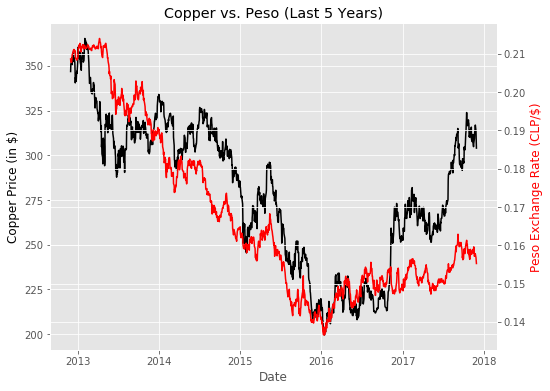

In [363]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize = (8,6))

ax1.plot(copper.Copper_Price, 'k-')
ax1.set_xlabel("Date")
ax1.set_ylabel("Copper Price (in $)", color = "k")
ax2 = ax1.twinx()
ax2.plot(clp.Peso_Price, 'r-')
ax2.set_ylabel("Peso Exchange Rate (CLP/$)", color = 'r')

ax1.set_title("Copper vs. Peso (Last 5 Years)")
ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)

plt.show()

The two assets appear to generally move together but a large deviation opens in late 2016. Hopefully, this move comes up in the screen for correlation movements and we can help isolate a couple events for discussion.

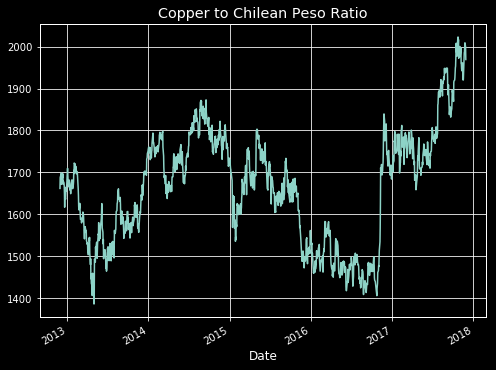

In [369]:
copper_clp = copper.dropna().join(clp)
copper_clp["ratio"] = copper_clp["Copper_Price"] / copper_clp["Peso_Price"]

fig, ax = plt.subplots(figsize = (8,6))
plt.style.use('dark_background')

copper_clp.ratio.plot()
ax.set_title("Copper to Chilean Peso Ratio")

plt.show()

Again, here the denominations make our ratio look very out of place. I will adjust the denominations before discussing the ratio.

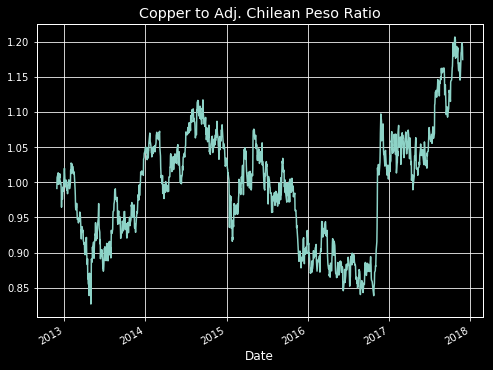

In [370]:
ratio_median = copper_clp.ratio.median()
copper_clp["adj_Peso"] = copper_clp["Peso_Price"] * ratio_median
copper_clp["adj_ratio"] = copper_clp["Copper_Price"] / copper_clp["adj_Peso"]

fig, ax = plt.subplots(figsize = (8,6))
plt.style.use('dark_background')

copper_clp.adj_ratio.plot()
ax.set_title("Copper to Adj. Chilean Peso Ratio")

plt.show()

Again, because we are only adjusting the ratio by a scalar, the plot should not look much different. However, here the plot does seem to come back to 1 often and stabilize around there. In addition, the period of late 2016 again gets flagged in this plot where movement was strictly in one direction.

In [322]:
reg_data = copper_clp[["Peso_Price", "Copper_Price"]].copy()
results = smf.ols("Peso_Price ~ Copper_Price",
                 data = reg_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Peso_Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     3077.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:17:37   Log-Likelihood:                 3801.4
No. Observations:                1257   AIC:                            -7599.
Df Residuals:                    1255   BIC:                            -7589.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0412      0.002     17.918   

Again here due to the difference in scales, the regression can be a little difficult to interpret. Let us adjust.

In [323]:
reg_data["Peso_Price_100"] = reg_data["Peso_Price"] * 100
reg_data.drop("Peso_Price", axis = 1, inplace = True)
results = smf.ols("Peso_Price_100 ~ Copper_Price",
                 data = reg_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Peso_Price_100   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     3077.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:21:58   Log-Likelihood:                -1987.3
No. Observations:                1257   AIC:                             3979.
Df Residuals:                    1255   BIC:                             3989.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1227      0.230     17.918   

The coefficient here does help establish a relationship between the two assets. For every dollar increase in copper prices, the Chilean Peso appreciates $0.000453. 

The intercept points back to the intrinsic value of the Chilean Peso. Stripping out the value of the copper exports from Chile, the Peso itself is worth $0.04 or 4 cents. This value does not possess any sort of practical meaning but is interesting food for thought. 

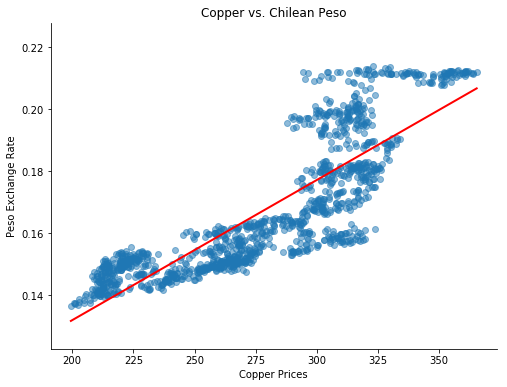

In [325]:
fig, ax = plt. subplots(figsize = (8,6))

ax.scatter(copper_clp["Copper_Price"],
          copper_clp["Peso_Price"],
          alpha = 0.50)

predictions = results.predict(exog = copper_clp["Copper_Price"].sort_values()) / 100

ax.plot(copper_clp["Copper_Price"].sort_values(), predictions, 
       color = 'r', linewidth = 2.0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Copper vs. Chilean Peso")
ax.set_ylabel("Peso Exchange Rate") 
ax.set_xlabel("Copper Prices")

plt.show()

In a similar fashion to the Oil and Ruble graph, the line of best fit here split sections of the graph. In the middle, the points are largely below the line while on the edges, the points are largely above the line. The simple solution to this is a quadratic function. 

In [327]:
reg_data["Copper_Price_sqrd"] = np.square(reg_data["Copper_Price"])
results = smf.ols("Peso_Price_100 ~ Copper_Price_sqrd",
                 data = reg_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Peso_Price_100   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     3469.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:33:20   Log-Likelihood:                -1932.9
No. Observations:                1257   AIC:                             3870.
Df Residuals:                    1255   BIC:                             3880.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.1303      0.11

Using the copper price squared as the key parameter, the R-squared value improves to 0.734 from 0.710. This increase appears more significant to me as it is a larger jump from a lower base. The equation produced would be: $$ peso = (8.347 * 10^{-7})copper^2 + 0.101303 $$

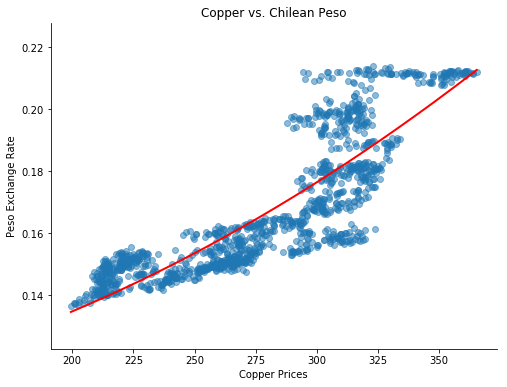

In [330]:
fig, ax = plt. subplots(figsize = (8,6))

ax.scatter(copper_clp["Copper_Price"],
          copper_clp["Peso_Price"],
          alpha = 0.50)

predictions = results.predict(exog = reg_data["Copper_Price_sqrd"].sort_values()) / 100

ax.plot(copper_clp["Copper_Price"].sort_values(), predictions, 
       color = 'r', linewidth = 2.0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Copper vs. Chilean Peso")
ax.set_ylabel("Peso Exchange Rate") 
ax.set_xlabel("Copper Prices")

plt.show()

The improvement appears less marked in the graph. At the extremes, the points still remain above the line while in the middle, the points still remain well below the line. I could attempt to fit the model with a cubic or a quartic function but given my hesitations over the practical significance of a quadratic model, I will avoid the higher order models.

Nevertheless, this additional analysis does assuage my concerns over the quadratic model some. While this plot does appear a little clumsy at higher copper prices, the trajectory does support the notion that currencies perform better at higher commodity prices. This may be because the price growth does indeed flow directly to the economy's bottom line. I wonder if similar plots will appear for the other two. 

Let's move to the rolling correlations.

In [331]:
copper_clp["Pearson_30"] = copper_clp["Copper_Price"].rolling(window = 30).corr(copper_clp["Peso_Price"])
copper_clp["p30_shift"] = copper_clp["Pearson_30"].shift(1, freq = 'B')
copper_clp["p30_delta"] = copper_clp["Pearson_30"] - copper_clp["p30_shift"]
copper_clp["p30_delta_abs"] = np.absolute(copper_clp["p30_delta"])
max_20_delta = copper_clp.sort_values(by = "p30_delta_abs", ascending = False).head(20)
max_20_delta.sort_index(axis = 0)

,Copper_Price,Copper_Volume,Peso_Price,ratio,adj_Peso,adj_ratio,Pearson_30,p30_shift,p30_delta,p30_delta_abs
Date,,,,,,,,,,
2013-04-17,304.65,1648.0,0.21058,1446.718587,353.067225,0.862867,0.110066,-0.125266,0.235331,0.235331
2013-04-18,306.35,1019.0,0.21004,1458.531708,352.161838,0.869913,0.288796,0.110066,0.178730,0.178730
2013-05-22,323.65,162.0,0.20479,1580.399434,343.359469,0.942598,-0.123285,0.063878,-0.187163,0.187163
2013-06-13,303.80,3056.0,0.20329,1494.416843,340.844506,0.891316,0.142787,-0.034395,0.177182,0.177182
2013-06-14,305.45,1066.0,0.20272,1506.758090,339.888821,0.898676,0.363150,0.142787,0.220363,0.220363
2013-12-12,319.10,195.0,0.18832,1694.456245,315.745179,1.010625,-0.230263,-0.034086,-0.196177,0.196177
2014-01-10,328.55,1042.0,0.18888,1739.464210,316.684098,1.037469,0.387595,0.213516,0.174079,0.174079
2014-08-11,316.75,2485.0,0.17403,1820.088490,291.785968,1.085556,0.646066,0.474258,0.171808,0.171808
2014-10-17,299.00,419.0,0.17050,1753.665689,285.867423,1.045939,0.101723,0.293808,-0.192086,0.192086


For copper and the Chilean Peso, there were a few periods of interest. I've listed them below.

| Periods of Interest |
|:-----------------|
| April 17th to 18th, 2013 |
| June 23rd to 24th, 2013 |
| January 13th to 14th, 2015 |
| December 21st to 22nd, 2016 |
| April 12th to 13th, 2017 |

I will go through each of them below.

First, for the consecutive days in April, three supply-side events occur to impact copper prices. [Glencore received approval from Chinese authorities to acquire Xstrata](https://www.reuters.com/article/us-glencore-xstrata-china/glencore-clinches-chinese-approval-with-copper-deal-idUSBRE93F0DE20130417) which also led to Glencore's spinoff of an existing copper mine. This move likely eased supply-side tensions. However, the second event involved a landslide in Utah which [impacted a copper mine in the area](https://www.deseretnews.com/article/865578416/Landslide-will-cause-50-production-drop-at-Bingham-mine-Kennecott-says.html). The third event included a [political measure to halt the export of copper from the Congo](https://www.reuters.com/article/congo-democratic-copper/update-2-congo-bans-exports-of-copper-cobalt-concentrates-idUSL5N0D437H20130417). In this research, what was significant was who was reporting which event. While Reuters, Bloomberg, and the WSJ all reported the Glencore move, the other two events were reported mostly by smaller sites. This leads me to believe that the market was reacting to an ease in supply-side tensions from the Glencore move and should re-correlate the two assets. Indeed over those two days, the correlation increased.

Between June 23rd and June 24th, 2013, there were a few supply-side events to impact the two assets but the most important event appears to be the [end of the labor dispute in the Collahuasi mine](http://www.mining.com/world-no-3-copper-mine-collahuasi-and-workers-settle-differences-54050/). As the world's third-largest mine is located in Chile, a re-opening would likely send a positive signal for both the copper market as well as the Chilean Peso. 

For the period during January 2015, no specific stories stood out. Instead, a series of articles (including [this one](https://www.ft.com/content/e356dbb2-9c00-11e4-a6b6-00144feabdc0), [this one](https://www.ft.com/content/9cd47970-9bd7-11e4-b6cc-00144feabdc0), and [this one](https://www.wsj.com/articles/copper-sinks-to-five-year-low-1421206135) spoke broadly about the market and pointed to a change in expectations. These types of moves are really puzzling from a market standpoint. While nothing material appears to have changed, the market reacts strikingly. 

While the late December period included [another big mine resolution](https://in.reuters.com/article/codelco-wages/wage-deal-reached-at-chile-codelcos-chuquicamata-mine-idINC0N19Q01H), I do not think this is the big correlation-resurrecting event. Instead, I look at this period as another time for investors to build on their [expectations for a Trump's presidency](https://www.reuters.com/article/us-mining-alaska-trump/trump-win-ignites-hope-for-stalled-alaska-copper-gold-mine-idUSKBN14A287). Even though there is only two days of such movement in this screen, Trump's promise for infrastructure investment and deregulation of US mines must have had an impact on markets.

This April period is unique since among the five listed, it is the only period to witness a decrease in correlation. A decrease in correlation is likely when news from the country sends the currency in a divergent path from the currency. With that said, two pieces of news came out of Chile during that time period. [The central bank of Chile cut rates by 25 basis points](https://www.reuters.com/article/chile-cenbank-rates/update-2-chiles-central-bank-cuts-rate-25-points-moderates-bias-idUSL1N1HL1RT). As the article indicates, this was not an expected move and likely weakened the currency slightly in an upbeat market. Second, Cochilco, the state copper commission, announced that [copper production would come in under expectations this year](https://www.reuters.com/article/chile-copper/update-1-chile-to-produce-less-than-5-6-mln-tonnes-of-copper-in-2017-cochilco-idUSL1N1HL0PL).

Lastly, the period of divergence between the two assets that occurred in late 2016 did not pop up on the correlation swings screen. I am not that familiar with statstics so I do not have a great understanding of why. If I was to guess, I would think that the Chilean Peso probably witnessed some gains during the period just not as great as copper. I do believe that the copper rally was due to Trump's election. Chile did not particularly stand to gain from Trump's election and this may have moderated returns on the Peso. 

### Iron Ore and the Australian Dollar

Same rules here as the copper section.

In [343]:
iron_ore.set_index("Date", inplace = True)
iron_ore.drop("PX_VOLUME", axis = 1, inplace = True)
iron_ore.columns = ["IO_Price"]
#On Bloomberg, iron ore prices appear as an index since iron ore is traded in China not New York.
#As a result, there is no volume data available.
aud.set_index("Date", inplace = True)
aud.drop("PX_VOLUME", axis = 1, inplace = True)
aud.columns = ["Dollar_Price"]

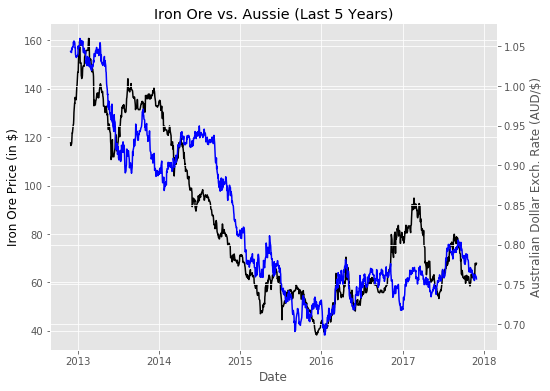

In [364]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize = (8,6))

ax1.plot(iron_ore.IO_Price, 'k-')
ax1.set_xlabel("Date")
ax1.set_ylabel("Iron Ore Price (in $)", color = 'k')
ax2 = ax1.twinx()
ax2.plot(aud.Dollar_Price, 'b-')
ax2.set_ylabel("Australian Dollar Exch. Rate (AUD/$)")

ax1.set_title("Iron Ore vs. Aussie (Last 5 Years)")
ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)

plt.show()

The two assets appear to generally move together which supports my assumption. Here, again in late 2016, there is significant divergence between the currency and the commodity. This also would appear to fall into the Trump reflation trade bucket. Let us see if this time this window appears on the correlation swings screen.

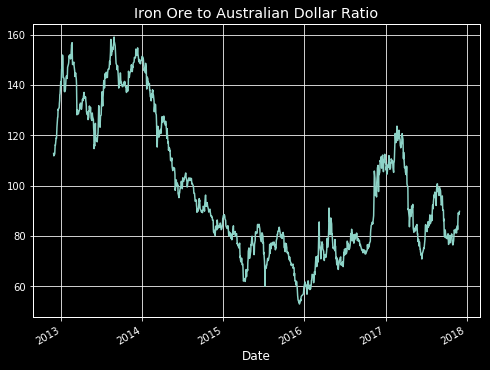

In [371]:
io_aud = iron_ore.dropna().join(aud)
io_aud["ratio"] = io_aud["IO_Price"] / io_aud["Dollar_Price"]

fig, ax = plt.subplots(figsize = (8,6))
plt.style.use('dark_background')

io_aud.ratio.plot()
ax.set_title("Iron Ore to Australian Dollar Ratio")

plt.show()

Compared to our y-scales in the previous examples, this scale is not so out of place. In any case, I wil adjust it for consistency.

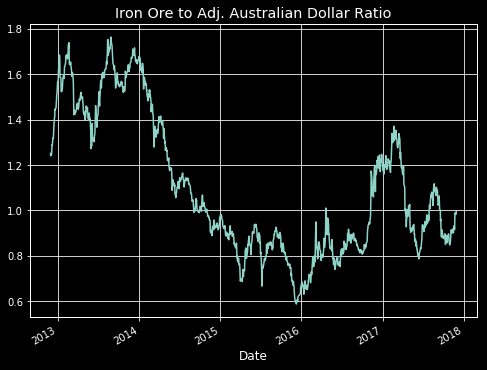

In [372]:
ratio_median = io_aud.ratio.median()
io_aud["adj_Dollar"] = io_aud["Dollar_Price"] * ratio_median
io_aud["adj_ratio"] = io_aud["IO_Price"] / io_aud["adj_Dollar"]

fig, ax = plt.subplots(figsize = (8,6))
plt.style.use('dark_background')

io_aud.adj_ratio.plot()
ax.set_title("Iron Ore to Adj. Australian Dollar Ratio")

plt.show()

Over the last five years, the story with iron ore has been "cyclical decline". With slowing growth abroad, the price of iron ore has declined. This graph tells us that these declines have not been passed through to the Australian dollar. In addition, here, the presence of Trump is also felt.

In [350]:
reg_data = io_aud[["Dollar_Price", "IO_Price"]].copy()
results = smf.ols("Dollar_Price ~ IO_Price", 
                 data = reg_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Dollar_Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5189.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        17:47:57   Log-Likelihood:                 2116.5
No. Observations:                1261   AIC:                            -4229.
Df Residuals:                    1259   BIC:                            -4219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5968      0.004    169.387      0.0

Here, the denominations are actually in a surprisingly comfortable range. A dollar increase in iron ore prices leads to a $0.0028 appreciation of the Australian Dollar. 

In addition, the intrinsic value of Australian Dollar is $0.5968 according to the model. Stripping out of the value of iron ore leaves the Australian Dollar worth about three-fifths of the US Dollar. As I alluded to the cyclical decline of iron ore earlier, the Australian Dollar has fallen over the last five years as the graph showed. In a sense, as iron ore prices slumped, the Australian Dollar progressed back to its intrinsic value.

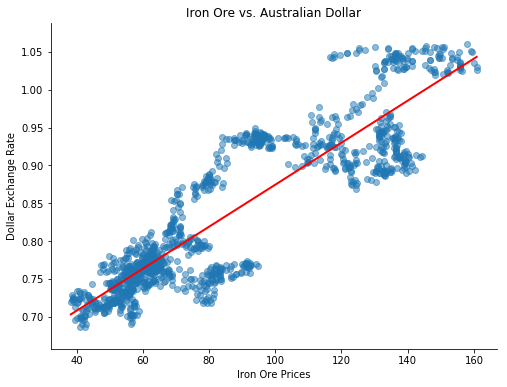

In [354]:
fig, ax = plt. subplots(figsize = (8,6))

ax.scatter(io_aud["IO_Price"],
          io_aud["Dollar_Price"],
          alpha = 0.50)

predictions = results.predict(exog = io_aud["IO_Price"].sort_values())

ax.plot(io_aud["IO_Price"].sort_values(), predictions, 
       color = 'r', linewidth = 2.0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Iron Ore vs. Australian Dollar")
ax.set_ylabel("Dollar Exchange Rate") 
ax.set_xlabel("Iron Ore Prices")

plt.show()

This plot appears a little different from the other plots. At the lower extreme, the line appears to fit relatively well. However, in the middle, the points remain above the line and continue to remain above the line at the upper extreme. As opposed to our previous examples, this plot does not look to fit a quadratic function. For consistency's sake, I will include it.

In [355]:
reg_data["IO_Price_sqrd"] = np.square(reg_data["IO_Price"])
results = smf.ols("Dollar_Price ~ IO_Price_sqrd",
                 data = reg_data).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Dollar_Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     4500.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:00:06   Log-Likelihood:                 2045.2
No. Observations:                1261   AIC:                            -4086.
Df Residuals:                    1259   BIC:                            -4076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7148      0.002    321.613

Using iron ore prices squared as the key parameter actually weakened the measured correlation (down from 0.805 to 0.781). I do not know how signifcant of a drop this is but I have listed the equation from the model below for reference. 
$$ aussie = (1.42*10^{-5})iron ore^2 + 0.7148 $$

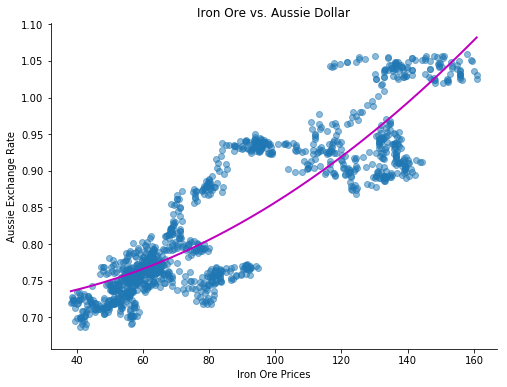

In [356]:
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(io_aud["IO_Price"],
          io_aud["Dollar_Price"],
          alpha = 0.50)

predictions = results.predict(exog = reg_data["IO_Price_sqrd"].sort_values())

ax.plot(io_aud["IO_Price"].sort_values(), predictions, 
       color = 'm', linewidth = 2.0)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Iron Ore vs. Aussie Dollar")
ax.set_ylabel("Aussie Exchange Rate")
ax.set_xlabel("Iron Ore Prices")

plt.show()

In this plot, the groups of points above the initial line are even higher relative to this curve. In addition, relative to the other two curves, this curve appears flatter. This shape is likely due to the weaker correlation against the square term.

Even so, there are large segments of points that appear to support the notion that the relationship between commodities and currencies could be quadratic. The lower extreme and the area just under the top of the plot (iron ore prices between 100 and 140) seem to fit the quadratic curve.

Now, on to the rolling correlations.

In [358]:
io_aud["Pearson_30"] = io_aud["IO_Price"].rolling(window = 30).corr(io_aud["Dollar_Price"])
io_aud["p30_shift"] = io_aud["Pearson_30"].shift(1, freq = 'B')
io_aud["p30_delta"] = io_aud["Pearson_30"] - io_aud["p30_shift"]
io_aud["p30_delta_abs"] = np.absolute(io_aud["p30_delta"])
max_20_delta = io_aud.sort_values(by = "p30_delta_abs", ascending = False).head(20)
max_20_delta.sort_index(axis = 0)

,IO_Price,Dollar_Price,ratio,adj_Dollar,adj_ratio,Pearson_30,p30_shift,p30_delta,p30_delta_abs
Date,,,,,,,,,
2013-07-04,124.01,0.9147,135.574505,82.457515,1.503926,-0.397147,-0.181406,-0.215741,0.215741
2013-09-16,133.52,0.9318,143.292552,83.999029,1.589542,-0.341699,-0.101721,-0.239978,0.239978
2013-09-17,131.41,0.9356,140.455323,84.341588,1.558069,-0.553679,-0.341699,-0.211980,0.211980
2013-12-17,133.03,0.8899,149.488707,80.221868,1.658276,-0.029017,-0.290731,0.261714,0.261714
2014-02-25,116.62,0.9019,129.304801,81.303632,1.434376,-0.372856,-0.150613,-0.222243,0.222243
2014-07-30,96.10,0.9331,102.990033,84.116221,1.142467,-0.393893,-0.173613,-0.220279,0.220279
2014-08-13,93.59,0.9305,100.580333,83.881838,1.115736,0.172455,-0.052501,0.224956,0.224956
2014-09-10,82.22,0.9155,89.808848,82.529632,0.996248,0.141553,-0.091901,0.233455,0.233455
2015-06-04,64.77,0.7688,84.248179,69.305059,0.934564,-0.072898,0.148527,-0.221425,0.221425


From this list of correlation swings, four periods emerge. First, both September 16th and 17th of 2013 possesses large correlation swings. Second, the period around July 4th, 2015, possesses three days with significant swings in correlation. Third, April 20th, 2016 and April 21st, 2016 have associated swings in correlation between the two assets. Lastly, June 29th and 30th of this past year have large correlation swings.

From September 15th to September 17th, the correlation between the two assets moves negative. This move indicates a divergence between the two assets and leads me to believe that Australia experienced a uniquely positive event. Indeed, on September 18th, 2013, [Tony Abbott was sworn in as the Australian Prime Minister](https://www.ctvnews.ca/world/tony-abbott-sworn-in-as-australia-s-new-prime-minister-1.1459501). Abbott represented the conservative faction within Australian politics and promoted domestic industries. His pro-growth agenda likely fueled the movement in the Australian dollar.

The period during the middle of the summer in 2015 does not appear to have a specific catalysts. Instead, my research around this period pulled up articles similar to [this Business Insider Australia article](https://www.businessinsider.com.au/chart-iron-ore-imports-from-port-hedland-hit-a-record-high-in-june-2015-7). All in all, Australia's iron ore industry seems to post stronger than expected growth numbers, aligning the industry and the country. I am not entirely sure that this news is the market catalyst but it does align with my logic.

Again, during the two days in April 2016, correlation between the two assets increases. This increase appears to be a result of an [earnings guidance revision from two major commodity producers](https://www.cnbc.com/2016/04/19/bhp-rio-iron-ore-output-guidance-cuts-could-boost-prices-as-china-steel-demand-recovers.html): BHP Billiton and Rio Tinto. Both companies possess signifcant operations in Australia. These operations appear to have been impacted by weather and other Australia-specific incidents. This would align these two markets and build correlation.

The last major event seems to be a product of this summer's commodity bull market. Articles such as [this Bloomberg piece](https://www.bloomberg.com/news/articles/2017-06-29/iron-ore-surges-into-bull-market-as-mills-come-off-the-sidelines) and [this Mining.com piece](http://www.mining.com/iron-ore-price-jumps-8-week-high/) indicate that iron ore peformed relatively well over the summer. As the iron ore market outperformed, asset managers appear to have focused on finding other proxies for the exposure. The Australian dollar is an example of such proxy.

### Gold and the Swiss France

As I started to do the analysis for this pair, I started to realize that this pair was very unlike the others. Because gold does not trade as a normal metal or commodity, gold was prone to wild swings in value based on market risk. If the market wanted to take on more risk, it would move out of gold; if the market felt fearful, it would move back into gold. Yet through all this movement, gold continued to appreciate.

As a result, this pair was not following the supply-demand fundamentals I was looking to isolate. For that reason, I have excluded it from this project. I want my big takeaways to focus on what I have learned through this analysis and frankly, this pair was not adding much information.

## Big Takeaways

A few big picture ideas to come away with:

First, the relationship between commodities and currencies may be better expressed as a quadratic function as opposed to a linear function. Currencies appear to benefit more from the incremental increase in commodity prices in high commodity price environments than low price environments. As shown throughout this exercise, I am still struggling to tell if this assumption is fair or not but the data seem to bear it out. This may have more to do with the investing environment than the fundamental relationship between the two assets. That may be a question for another project (though I am not sure how to approach it).

Second, for the regression models, many of the regression results' panels cited multicollinearity within the regression. Since I only have one predictor for each model, I am not exactly sure what this means. It may allude to the fact that many external factors contribute to the appreciation and depreciation of both assets. However, to be more statisically rigourous, this point may be worth further investigation.

Third, again on the models, for the quadratic models, I avoided adding a linear term to the quadratic term and in turn avoiding polynomials. This choice was made out of concern that such a model would shift the curve into quadrant 1. As a result, at some point between the x-axis and the minimum, the curve would indicate an increase in the commodity price has a negative impact on commodities. Since this argument fought against my basic assumption, I chose to exclude it. However, given that quadratics on the whole have proven more effective, this may be worth a try.

Fourth, for the correlation swings largely unaccounted for, a factor that could be at play is dollar strength. Because both assets are priced in terms of dollars, dollar strength would send both assets moving in the same direction. This could facilitate correlation and lead to high swings. While these dates would not be useful in the lens I envisioned, they could help evaluate dollar strength.

All in all, this project did introduce me to the idea of correlation between commodities and currencies and their presence in markets. All three pairs I tested (four if you include gold and CHF) possessed high correlation and indicated some connection in markets. I want to see if I can take the next step with this project and build a longer-term trading strategy. This would require expanding my sample period; I wonder how different this 5 year period I have selected would fare against other periods. What about the peak of the crisis with oil at $100? Lots of questions...more work to do.